<a href="https://colab.research.google.com/github/Julianprograma/Julianprograma/blob/main/Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Cargar los datos desde un archive CSV o similar
data = pd.read_csv('drive/MyDrive/Colab/crop_production.csv')

#Explorar el conjunto de datos
print(data.head())
print(data.info())
print(data.describe())

   FarmID    CropYield    Rainfall  FertilizerUsed SoilQuality
0    4930  3345.822114   50.804426       64.355908        Poor
1    2800  3433.470652  182.876364       50.592325        Good
2    8445  1826.124256  233.117324       35.862123        Good
3    8501  1351.864297  132.466819       33.877933     Average
4    2271  2475.085170  275.288970       55.170467     Average
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FarmID          2000 non-null   int64  
 1   CropYield       2000 non-null   float64
 2   Rainfall        2000 non-null   float64
 3   FertilizerUsed  2000 non-null   float64
 4   SoilQuality     2000 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 78.2+ KB
None
            FarmID    CropYield     Rainfall  FertilizerUsed
count  2000.000000  2000.000000  2000.000000     2000.000000
mean   5518

In [6]:
#Crear la variable objetivo (rendimiento alto o bajo)
data['CropYield'] = np.where(data['CropYield'] > 3000, 1, 0)

In [9]:
#Separar las variables independientes (X) y la dependiente (y)
X = data.drop(['Rainfall', 'FertilizerUsed','SoilQuality'], axis=1) #Supón que 'target' es la columna de etiqueta/clase
y = data['CropYield']

#Dividir el dataset en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Estandarizar los datos (opcional pero recomendable para  logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#Crear el modelo de Regresión Logística
logistic_model = LogisticRegression()

#Entrenar el modelo
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
#Realizar predicciones con el conjunto de prueba
y_pred = logistic_model.predict(X_test_scaled)

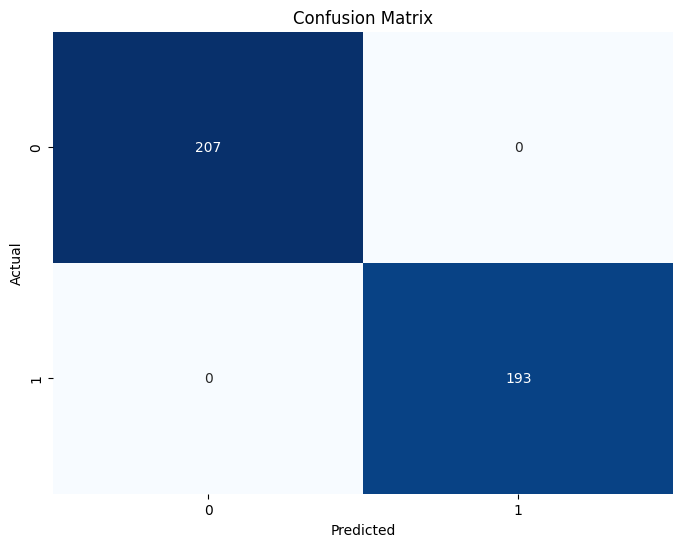

In [12]:
#Crear la matriz de confusión
confu_matrix = confusion_matrix(y_test, y_pred)

#Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
#Imprimir el reporte de clasificaión
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       193

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [14]:
#Imprimir la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy * 100:.2f}%')

Exactitud del modelo: 100.00%
